## model1磁性与非磁性分类模型

### 导入数据

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('new2417.csv', index_col = 0)
data.head(2)

,Formula,SGnumber,Magmom,Magnetic
0,Ca4As4,14,0.0,False
1,In2Se2,12,0.0,False


In [2]:
data['Magnetic'].value_counts()

False    1292
True     1125
Name: Magnetic, dtype: int64

### 添加特征

In [3]:
from matminer.featurizers.conversions import StrToComposition
data_Composition = StrToComposition().featurize_dataframe(data, 'Formula')
data_Composition.head(2)

StrToComposition:   0%|          | 0/2417 [00:00<?, ?it/s]

,Formula,SGnumber,Magmom,Magnetic,composition
0,Ca4As4,14,0.0,False,"(Ca, As)"
1,In2Se2,12,0.0,False,"(In, Se)"


In [4]:
from matminer.featurizers.conversions import CompositionToOxidComposition
data_Oxide = CompositionToOxidComposition().featurize_dataframe(data_Composition, 'composition')
data_Oxide.head(2)

CompositionToOxidComposition:   0%|          | 0/2417 [00:00<?, ?it/s]

,Formula,SGnumber,Magmom,Magnetic,composition,composition_oxid
0,Ca4As4,14,0.0,False,"(Ca, As)","(Ca2+, As3-, As-)"
1,In2Se2,12,0.0,False,"(In, Se)","(In+, In3+, Se2-)"


In [5]:
from matminer.featurizers.composition import OxidationStates
data_OS = OxidationStates().featurize_dataframe(data_Oxide, 'composition_oxid')
data_OS.head()

OxidationStates:   0%|          | 0/2417 [00:00<?, ?it/s]

,Formula,SGnumber,Magmom,Magnetic,composition,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state
0,Ca4As4,14,0.0,False,"(Ca, As)","(Ca2+, As3-, As-)",-3,2,5,2.683282
1,In2Se2,12,0.0,False,"(In, Se)","(In+, In3+, Se2-)",-2,3,5,2.683282
2,Sc4S6,65,0.0,False,"(Sc, S)","(Sc3+, S2-)",-2,3,5,3.535534
3,Zr3B2H2S2,187,0.0,False,"(Zr, B, H, S)","(Zr2+, Zr4+, B3-, H+, S2-)",-3,4,7,2.704163
4,Zr2Te10,59,0.0,False,"(Zr, Te)","(Zr4+, Te2-, Te4+)",-2,4,6,4.000000


In [6]:
from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name='magpie')
data_EP = ep_feat.featurize_dataframe(data_OS, col_id = 'composition')
data_EP.head(2)

ElementProperty:   0%|          | 0/2417 [00:00<?, ?it/s]

,Formula,SGnumber,Magmom,Magnetic,composition,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ca4As4,14,0.0,False,"(Ca, As)","(Ca2+, As3-, As-)",-3,2,5,2.683282,...,0.0,0.0,0.0,0.0,166.0,225.0,59.0,195.5,29.5,166.0
1,In2Se2,12,0.0,False,"(In, Se)","(In+, In3+, Se2-)",-2,3,5,2.683282,...,0.0,0.0,0.0,0.0,14.0,139.0,125.0,76.5,62.5,14.0


### 导入必要库

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [8]:
y = data_EP['Magnetic'].values
excluded = ['Formula', 'Magmom', 'composition', 'composition_oxid', 'Magnetic']
X = data_EP.drop(excluded, axis = 1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.3,
                                                    random_state = 42)

### 测试决策树分类

In [10]:
#model_DTC = DecisionTreeClassifier()
#path = model_DTC.cost_complexity_pruning_path(X_train, y_train)

#param_grid = {'ccp_alpha': path.ccp_alphas}
#kfold = KFold(n_splits = 10, shuffle = True, random_state =14)
#model_DTC = GridSearchCV(DecisionTreeClassifier(random_state = 123),
#                     param_grid, cv = kfold)
#model_DTC.fit(X_train, y_train)
#model_DTC.score(X_test, y_test)

In [11]:
#model_DTC.best_params_

In [12]:
#model_test = DecisionTreeClassifier(random_state = 123, ccp_alpha = 0.00205)
#model_test.fit(X_train, y_train)
#model_test.score(X_test, y_test)

### 测试未经交叉验证的随机森林模型

In [13]:
modelrfc = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', random_state=53)
modelrfc.fit(X_train, y_train)
modelrfc.score(X_test, y_test)

0.8732782369146006

### 转换y_train虚拟变量

In [14]:
y_train_dummy = pd.get_dummies(y_train)
y_train_dummy
y_train_dummy = y_train_dummy.iloc[:, 1]
y_train_dummy.head(5)

0    0
1    1
2    1
3    0
4    0
Name: True, dtype: uint8

### 10则交叉验证调节超参数

In [15]:
param_grid = {'n_estimators':(300, 400, 500),
              'max_features': range(15, 25),
              'min_samples_split': (2, 3, 4)}
kfold = StratifiedKFold(n_splits = 10, shuffle=True,
                        random_state = 1)
model_kf = GridSearchCV(RandomForestClassifier(random_state = 321),
                     param_grid, cv = kfold)

### 这一步时间较长建议越过此步骤

In [16]:
#model_kf.fit(X_train, y_train_dummy)

### 确定超参数

In [17]:
model_kf.best_params_

{'max_features': 18, 'min_samples_split': 3, 'n_estimators': 400}

In [17]:
model_rfc = RandomForestClassifier(n_estimators=400, 
                                   random_state = 346,
                                   max_features = 18, 
                                   min_samples_split = 3)

model_rfc.fit(X_train, y_train_dummy)
model_rfc.score(X_test, y_test)

0.8774104683195593

### 特征重要性排序

In [18]:
model_rfc.feature_importances_

array([2.65422547e-02, 1.24265336e-02, 8.04159056e-03, 9.42407771e-03,
       1.12912215e-02, 3.78126555e-03, 6.21893779e-03, 4.75308338e-03,
       8.00066427e-03, 6.83279816e-03, 2.03639750e-03, 1.77604511e-02,
       8.96481251e-03, 1.29746047e-02, 1.21604592e-02, 1.22041196e-02,
       1.26080717e-02, 3.30997598e-03, 6.19919610e-03, 6.59755981e-03,
       7.17157381e-03, 8.25150265e-03, 2.56715930e-03, 2.88411291e-03,
       1.80736402e-02, 1.91411964e-02, 1.59801003e-02, 1.44986591e-02,
       3.76530788e-03, 1.17640009e-02, 2.45399748e-03, 5.33422792e-03,
       1.16074316e-02, 1.10497170e-02, 1.19769088e-02, 1.00889493e-03,
       2.27640647e-03, 1.18369873e-03, 6.55967210e-03, 5.03743784e-03,
       1.69054329e-03, 2.57951396e-03, 2.73165582e-02, 6.55543388e-03,
       1.22119270e-02, 8.75026536e-03, 3.27754097e-03, 1.56873190e-02,
       3.59509934e-03, 9.39034881e-03, 3.09664828e-02, 9.79570251e-03,
       4.93533948e-02, 8.49383894e-04, 0.00000000e+00, 1.08505209e-03,
      

In [19]:
sorted_index = model_rfc.feature_importances_.argsort()
sorted_index

array([106, 101,  54,  83, 125,  71,  76,  95,  88, 130,  72,  73,  84,
       119, 100,  85,  53,  70,  59,  35,  55,  58,  37,  89,  61,  65,
        40, 136,  10,  60,  74,  36, 112, 124,  87,  30,  86,  22,  41,
        66, 121,  56, 107,  75,  23,  57,  82,  94, 131,  78,  46, 120,
        17,  77,  91,  48,  28,   5,  67,   7,  79,  39, 102,  31, 118,
       114, 123, 104, 105, 103,  18,   6, 122,  63,  43,  38,  19,   9,
        68,  20,  90,   8,   2,  62, 109,  21,  97, 135, 108, 127,  45,
        69,  12,  92, 115,  96,  81, 133,  80,  49,   3,  51, 132,  33,
        64,   4, 117,  32,  29,  34,  14,  15,  44,   1,  16,  13,  99,
       134,  98, 129, 126, 116,  27, 110, 128,  47,  26, 111,  11,  24,
        25,  93, 113,   0,  42,  50,  52], dtype=int64)

In [31]:
X.rename(columns={'MagpieData mode Electronegativity': 'Mode Electronegativity', 
                  'MagpieData mean Electronegativity': 'Mean Electronegativity', 
                  'MagpieData maximum CovalentRadius': 'Maximum CovalentRadius'}, inplace=True)

In [33]:
X.rename(columns={'MagpieData minimum GSvolume_pa': 'Minimum GSvolume_pa', 
                  'MagpieData avg_dev NpUnfilled': 'Avg_dev NpUnfilled', 
                  'MagpieData range MeltingT': 'Range MeltingT',
                  'MagpieData maximum MeltingT': 'Maximum MeltingT',
                  'MagpieData minimum MendeleevNumber': 'Minimum MendeleevN',
                  'MagpieData avg_dev NUnfilled': 'Avg_dev NUnfilled'}, inplace=True)

In [34]:
X.columns[sorted_index][-10:]

Index(['Avg_dev NUnfilled', 'Minimum MendeleevN', 'Maximum MeltingT',
       'Range MeltingT', 'Avg_dev NpUnfilled', 'Minimum GSvolume_pa',
       'SGnumber', 'Maximum CovalentRadius', 'Mean Electronegativity',
       'Mode Electronegativity'],
      dtype='object')

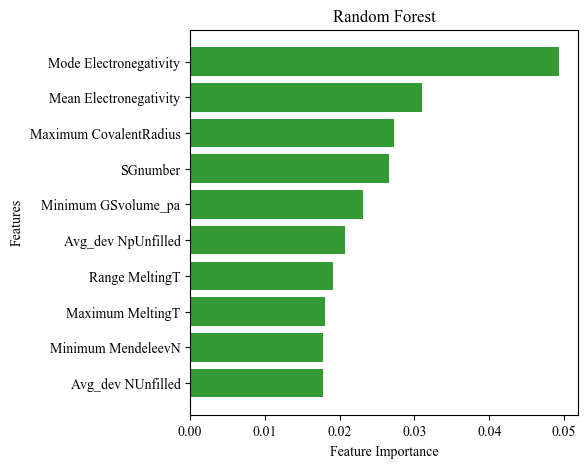

In [35]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
sorted_index = model_rfc.feature_importances_.argsort()
plt.figure(figsize = (5, 5))
plt.barh(range(10),
         model_rfc.feature_importances_[sorted_index][-10:],
         color='green', alpha = 0.8)
plt.yticks(np.arange(10), X.columns[sorted_index][-10:])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest')
plt.savefig('feature.png', dpi = 300, bbox_inches='tight')
#plt.show()

In [21]:
y_pred = model_rfc.predict(X_test)
y_pred.shape

(726,)

### 混淆矩阵绘图

[[343  45]
 [ 44 294]]


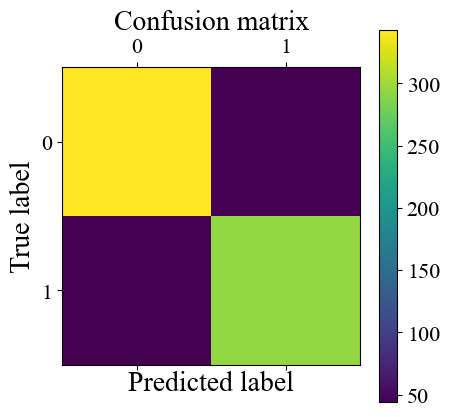

In [36]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c4.png', dpi = 300)
#plt.show()

In [24]:
#from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,0,1
Actual,,
False,343,45
True,44,294


In [25]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
Accuracy

0.8774104683195593

In [26]:
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision.round(3))

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity)

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

cohen_kappa_score(y_test, y_pred)

Precision: 0.867
0.8698224852071006
0.884020618556701
0.8672566371681416


0.753699425931432

In [27]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred)) 

0.8685376661742984


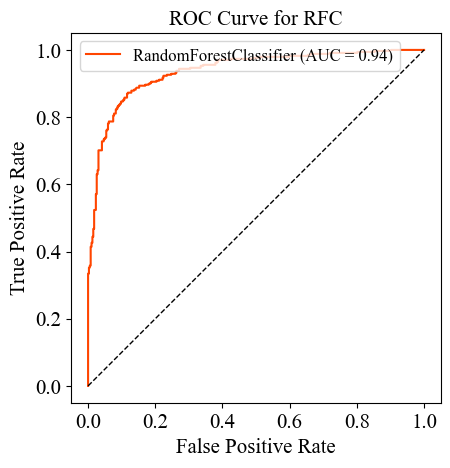

In [35]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_rfc, X_test, y_test, color = 'orangered')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for RFC', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r4.png', dpi = 300)
#plt.show()

### 外部数据测试external data

In [30]:
df_ex = pd.read_csv('testset0.csv', index_col = 0)
df_ex.head(2)

,Formula,SGnumber,Magmom,Magnetic
209,CrI3,162,6.001232,True
4955,CrGeTe3,162,6.002313,True


In [31]:
df_ex['Magmom'] = df_ex['Magmom'].round(3)
df_ex.head(2)

,Formula,SGnumber,Magmom,Magnetic
209,CrI3,162,6.001,True
4955,CrGeTe3,162,6.002,True


In [32]:
df_ex = StrToComposition().featurize_dataframe(df_ex, 'Formula')
df_ex = CompositionToOxidComposition().featurize_dataframe(df_ex, 'composition')
df_ex = OxidationStates().featurize_dataframe(df_ex, 'composition_oxid')
ep_feat = ElementProperty.from_preset(preset_name='magpie')
df_ex = ep_feat.featurize_dataframe(df_ex, col_id = 'composition')
df_ex.head()

StrToComposition:   0%|          | 0/10 [00:00<?, ?it/s]

CompositionToOxidComposition:   0%|          | 0/10 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/10 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/10 [00:00<?, ?it/s]

,Formula,SGnumber,Magmom,Magnetic,composition,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
209,CrI3,162,6.001,True,"(Cr, I)","(Cr3+, I-)",-1,3,4,2.828427,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,105.250000,61.875000,64.0
4955,CrGeTe3,162,6.002,True,"(Cr, Ge, Te)","(Cr2+, Ge4+, Te2-)",-2,4,6,3.380617,...,0.000000,0.000000,0.000000,0.0,152.0,229.0,77.0,182.000000,36.000000,152.0
2108,PrTe3,191,-0.000,False,"(Pr, Te)","(Pr4+, Te2-, Te-)",-2,4,6,2.966479,...,0.000000,0.000000,0.000000,0.0,152.0,194.0,42.0,162.500000,15.750000,152.0
3969,TiPb9O11,75,0.000,False,"(Ti, Pb, O)","(Ti4+, Pb2+, O2-)",-2,4,6,2.910428,...,0.000023,0.000001,0.000002,0.0,12.0,225.0,213.0,111.952381,104.712018,12.0
1691,TaSe,129,0.000,False,"(Ta, Se)","(Ta0+, Se0+)",0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.0,14.0,229.0,215.0,121.500000,107.500000,14.0


In [33]:
excluded = ['Formula', 'Magmom', 'composition', 'composition_oxid', 'Magnetic']
X_validation = df_ex.drop(excluded, axis = 1)
X_validation
y_validation = df_ex['Magnetic'].values

In [34]:
y_predv = model_rfc.predict(X_validation)
y_predv

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0], dtype=uint8)